Left Neighbour: Himesh Katru, Roll No. CO24BTECH11010

Right Neighbour: Guddeti Sreeteja, Roll No. CO24BTECH11009

In [205]:
import matplotlib.pyplot as plt
import numpy as np

## CMMS: Quiz 1 ##

### Question 1 ###

In [206]:
theta_0, omega_0 = 1, 0
g = 1
L = 1
m=1
I = m*(L**2)
# h_0 = I*omega_0
dt = 0.001
nt = 10000
def get_angacc(theta):
    return (-g/L)*theta
# x_exact = lambda k, m, t:np.sqrt(m/k) * np.sin(np.sqrt(k/m)*t)
# p_exact = lambda k, m, t: m * np.cos(np.sqrt(k/m)*t)
t = np.float32(np.zeros(nt+1))
for i in range(nt): t[i] = i*dt
theta_vv = np.float32(np.zeros(nt+1))
omega_vv = np.float32(np.zeros(nt+1))
theta_vv[0] = theta_0
omega_vv[0] = omega_0
angacc = get_angacc(theta_vv[0])
# omhalf = omega_vv[0] + 0.5*angacc*dt
for i in range(0,nt):
    omhalf = omega_vv[i] + 0.5*angacc*dt
    theta_vv[i+1] = theta_vv[i] + omhalf*dt
    # print(angacc)
    newangacc = get_angacc(theta_vv[i+1])
    # print(angacc)
    omega_vv[i+1] = omhalf + 0.5*newangacc*dt
    angacc = newangacc
print(theta_vv)

[ 1.          0.9999995   0.99999803 ... -0.84015656 -0.8396138
 -0.8390702 ]


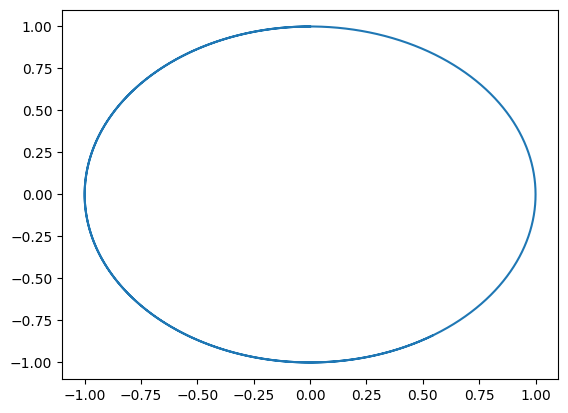

In [207]:
ang_mom = I*omega_vv
plt.plot(ang_mom, theta_vv)
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])

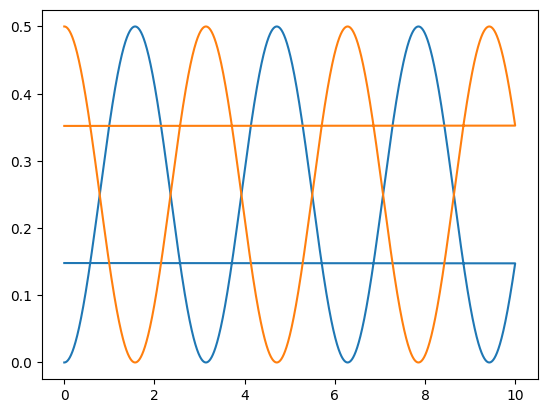

In [208]:
KE = lambda I, v: 0.5 * I * (v**2)
KE_vv = KE(I, omega_vv)
plt.plot(t, KE_vv, label = 'Kinetic Energy')
PE = lambda m, g, L, theta: 0.5*m*g*L*(theta**2)
PE_vv = PE(m, g, L, theta_vv)
plt.plot(t, PE_vv, label = 'Kinetic Energy')

From the above plots, we can see that the displacement and angular velocity of the pendulum oscillate over time, leading to a simple harmonic motion. This is supported by the fact that the energies oscillate periodically over time as well.

In [209]:
theta_0, omega_0 = 1, 0
g = 1
L = 1
m=1
b = 0.5
I = m*(L**2)
# h_0 = I*omega_0
dt = 0.001
nt = 10000
def get_angacc(theta, omega):
    return (-g/L)*theta - b*L*omega
# x_exact = lambda k, m, t:np.sqrt(m/k) * np.sin(np.sqrt(k/m)*t)
# p_exact = lambda k, m, t: m * np.cos(np.sqrt(k/m)*t)
t = np.float32(np.zeros(nt+1))
for i in range(nt): t[i] = i*dt
theta_vv = np.float32(np.zeros(nt+1))
omega_vv = np.float32(np.zeros(nt+1))
theta_vv[0] = theta_0
omega_vv[0] = omega_0
angacc = get_angacc(theta_vv[0], omega_0)
# omhalf = omega_vv[0] + 0.5*angacc*dt
for i in range(0,nt):
    omhalf = omega_vv[i] + 0.5*angacc*dt
    theta_vv[i+1] = theta_vv[i] + omhalf*dt
    # print(angacc)
    newangacc = get_angacc(theta_vv[i+1], omhalf)
    # print(angacc)
    omega_vv[i+1] = omhalf + 0.5*newangacc*dt
    angacc = newangacc
    angacc = get_angacc(theta_vv[i+1], omega_vv[i+1])
# print(theta_vv)

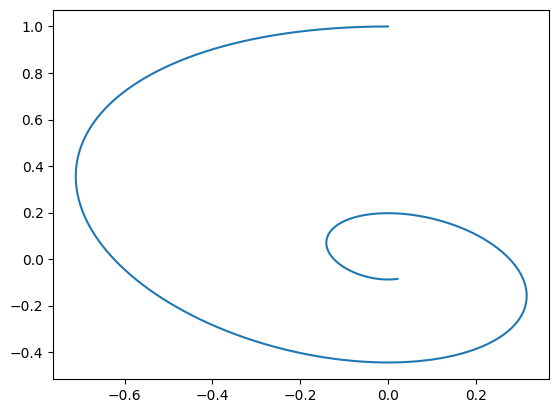

In [210]:
ang_mom = I*omega_vv
plt.plot(ang_mom, theta_vv)

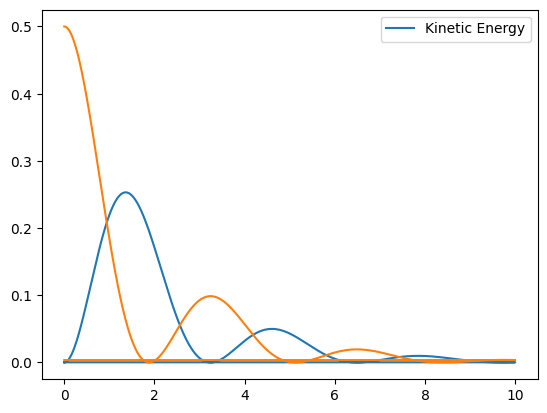

In [211]:
KE = lambda I, v: 0.5 * I * (v**2)
KE_vv = KE(I, omega_vv)
plt.plot(t, KE_vv, label = 'Kinetic Energy')
PE = lambda m, g, L, theta: 0.5*m*g*L*(theta**2)
PE_vv = PE(m, g, L, theta_vv)
plt.legend()
plt.plot(t, PE_vv, label = 'Potential Energy')

From the above plots, we can see that the displacement and angular velocity of the pendulum slowly die down to a single point over time, whilst oscilating, which is a damped harmonic motion. This is supported by the fact that the energies die out to zero as time goes to infinity.

### Question 2 ###

$$ \frac{\partial c(x, t)}{\partial t} = \nabla \cdot D \nabla c(x, t) $$
<!-- $$ \frac{\partial T}{\partial t} = K\frac{\partial^2 T}{\partial x^2} $$ -->
<!-- $$ T(x=0, t) = 25 $$ -->
$$ \frac{\partial c}{\partial x}(0, t) = 0 $$
$$ \frac{\partial c}{\partial x}(L, t) = 0 $$

Discretization of the Concentration Equation using the explicit scheme:

$$ x_i = i\Delta x, t_k = k\Delta t $$
$$ T_{i, k} = T(x_i, t_k) $$

$$i)\enspace D = D_0: $$

$$ \frac{\partial c}{\partial t} \approx \frac{c_{i, k+1} - c_{i, k}}{\Delta t} $$
$$ \nabla \cdot D \nabla c(r, t) = D_0 \nabla^2 c(r, t) = D_0\frac{\partial^2 c}{\partial x^2} \approx D_0\frac{c_{i+1, k} - 2c_{i, k} + c_{i-1, k}}{\Delta x^2}$$
$$ \implies \frac{c_{i, k+1} - c_{i, k}}{\Delta t} = D_0\frac{c_{i+1, k} - 2c_{i, k} + c_{i-1, k}}{\Delta x^2}$$
$$ \implies c_{i, k+1} = c_{i, k} + {F_x}*(c_{i+1, k} - 2c_{i, k} + c_{i-1, k}),  F_x = \frac{D_0\Delta t}{\Delta x^2}$$

In [212]:
#length 
# L = 1.0

#spatial divisions
dx = 0.1
# dy = 0.1
R = 3
n = 100
dt = 1e-3
D_0 = 1e-2
c_0 = 3
f = lambda x, L: np.where(x <= L/2, 0, c_0)
L_x = 10.0
def returnConcFTCS(L_x, dx, n, dt, D_0, f, c_0):
    nx = int(L_x/dx)
    nt = int(n/dt)
    x = np.linspace(0., L_x, nx+1)
    # for i in range(len(x)): x[i] = i*dx

    #iteration

    #timestep
    # print('dt=',dt)

    # t = np.linspace(0., n, nt+1)
    # print(t)

    #kappa
    # X, Y = np.meshgrid(x, y, indexing='ij')

    #Fourier number
    F_x = D_0*dt/(dx**2)
    # F_y = D_0*dt/(dy**2)
    # print('Fourier number=', F)

    ##temp
    c = np.zeros((nx+1, nt+1))

    #initial temperature (t=0) profile
    c[:,0] = f(x, L_x)
    # print(c[::10,::10,0])
    #boundary conditions
    # c[0, :, :] = c_0
    # c[-1, :, :] = c_0
    # c[:, -1, :] = c_0
    # c[:, 0, :] = c_0

    for k in range(1,nt+1):
        # c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + F_x*(c[2:,1:-1, k-1] - 2*c[1:-1,1:-1, k-1] + c[:-2,1:-1, k-1]) + F_y*(c[1:-1,2:, k-1] - 2*c[1:-1,1:-1, k-1] + c[1:-1,:-2, k-1])
        for i in range(1, nx):
                c[i, k] = c[i, k-1] + F_x*(c[i+1, k-1] - 2*c[i, k-1] + c[i-1, k-1])
        #Boundary Conditions
        c[0, k] = c[1, k]
        c[-1, k] = c[-2, k]
        # c[0, j] = 25
        # c[-1, j] = c[-2, j]
    return x, c
#length 
        

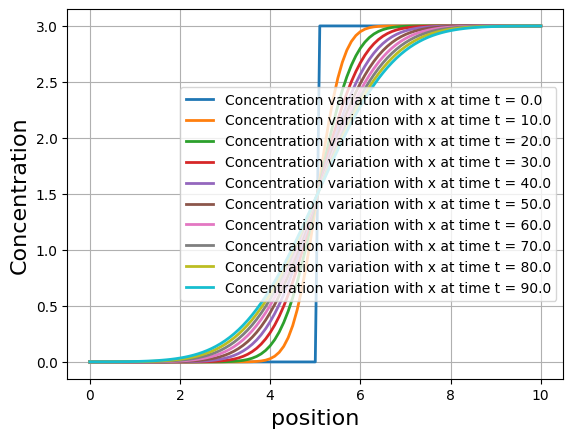

In [213]:
x, c = returnConcFTCS(L_x, dx, n, dt, D_0, f, c_0)
nt = int(n/dt)
for j in range(nt):
    if j%10000 == 0:
        plt.plot(x, c[:,j], ls='-', lw=2, label=f'Concentration variation with x at time t = {j*dt}')
plt.legend()
plt.xlabel('position', fontsize=16)
plt.ylabel('Concentration', fontsize=16)
plt.grid()

plt.show()

When diffusivity is constant, we get this plot. Clearly, the plot is stable as when we progress the system for a long time, the concentration variation doesn't destabilize and remains consistent.

$$ii)\enspace D = D_0*x^2: $$

$$ \frac{\partial c}{\partial t} \approx \frac{c_{i, k+1} - c_{i, k}}{\Delta t} $$
$$ \nabla \cdot D \nabla c(r, t) = D \nabla^2 c(r, t) + \nabla D \cdot \nabla c(r, t) = D\frac{\partial^2 c}{\partial x^2} + \frac{\partial D}{\partial x}\frac{\partial c}{\partial x} \approx {D_0}{x_i^2}\frac{c_{i+1, k} - 2c_{i, k} + c_{i-1, k}}{\Delta x^2} + 2{D_0}{x_i}\frac{c_{i+1, k} - c_{i-1, k}}{\Delta x}$$
$$ \implies \frac{c_{i, k+1} - c_{i, k}}{\Delta t} = {D_0}{x_i^2}\frac{c_{i+1, k} - 2c_{i, k} + c_{i-1, k}}{\Delta x^2} + 2{D_0}{x_i}\frac{c_{i+1, k} - c_{i-1, k}}{\Delta x}$$
$$ \implies c_{i, k+1} = c_{i, k} + {F_x}*{x_i}^2(c_{i+1, k} - 2c_{i, k} + c_{i-1, k}) + 2*{D_x}*{x_i}(c_{i+1, k} - c_{i-1, k}),  F_x = \frac{D_0\Delta t}{\Delta x^2}, D_x = \frac{D_0\Delta t}{\Delta x}$$

In [214]:
#length 
# L = 1.0

#spatial divisions
dx = 0.1
# dy = 0.1
R = 3
n = 100
dt = 1e-3
D_0 = 1e-2
c_0 = 3
f = lambda x, L: np.where(x <= L/2, 0, c_0)
L_x = 10.0
def returnConcSquare(L_x, dx, n, dt, D_0, f, c_0):
    nx = int(L_x/dx)
    nt = int(n/dt)
    x = np.linspace(0., L_x, nx+1)
    # for i in range(len(x)): x[i] = i*dx

    #iteration

    #timestep
    # print('dt=',dt)

    # t = np.linspace(0., n, nt+1)
    # print(t)

    #kappa
    # X, Y = np.meshgrid(x, y, indexing='ij')

    #Fourier number
    F_x = D_0*dt/(dx**2)
    D_x = D_0*dt/(dx)
    # F_y = D_0*dt/(dy**2)
    # print('Fourier number=', F)

    ##temp
    c = np.zeros((nx+1, nt+1))

    #initial temperature (t=0) profile
    c[:,0] = f(x, L_x)
    # print(c[::10,::10,0])
    #boundary conditions
    # c[0, :, :] = c_0
    # c[-1, :, :] = c_0
    # c[:, -1, :] = c_0
    # c[:, 0, :] = c_0

    for k in range(1,nt+1):
        # c[1:-1, 1:-1, k] = c[1:-1, 1:-1, k-1] + F_x*(c[2:,1:-1, k-1] - 2*c[1:-1,1:-1, k-1] + c[:-2,1:-1, k-1]) + F_y*(c[1:-1,2:, k-1] - 2*c[1:-1,1:-1, k-1] + c[1:-1,:-2, k-1])
        for i in range(1, nx):
                c[i, k] = c[i, k-1] + F_x*(x[i]**2)*(c[i+1, k-1] - 2*c[i, k-1] + c[i-1, k-1]) + 2*D_x*x[i]*(c[i+1, k-1] - c[i-1, k-1])
        #Boundary Conditions
        c[0, k] = c[1, k]
        c[-1, k] = c[-2, k]
        # c[0, j] = 25
        # c[-1, j] = c[-2, j]
    return x, c
#length 
        

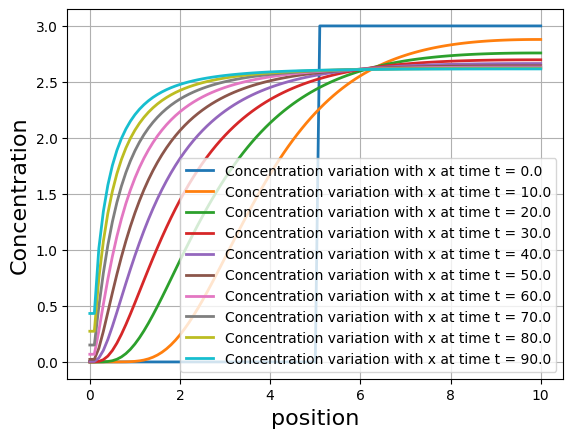

In [215]:
x, c_S = returnConcSquare(L_x, dx, n, dt, D_0, f, c_0)
nt = int(n/dt)
for j in range(nt):
    if j%10000 == 0:
        plt.plot(x, c_S[:,j], ls='-', lw=2, label=f'Concentration variation with x at time t = {j*dt}')
plt.legend()
plt.xlabel('position', fontsize=16)
plt.ylabel('Concentration', fontsize=16)
plt.grid()

plt.show()

When diffusivity varies with position as given, we get this plot. Clearly, for the chosen values of dt and dx, the plot is stable as when we progress the system for a long time, the concentration variation doesn't destabilize and remains consistent.

In [216]:
def simps(y,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    # x = np.linspace(a,b,N+1)
    # y = f(x)
    w = np.ones(N + 1)
    w[1:-1:2] = 4
    w[2:-2:2] = 2
    # Weighted sum along the x-axis (axis=1 if each row is a dataset)
    S = dx / 3 * np.sum(w * y, axis=1)
    return S
# np.sum(c, axis=1)
M = simps(c, 0, L_x, 50)
plt.plot(M)

ValueError: operands could not be broadcast together with shapes (51,) (101,100001) 